In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pdb
import sys
if '../' not in sys.path:
    sys.path.insert(0,'../')
import math, random
    
from solvers.deepqlearn import DQN

import gym
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd 
import torch.nn.functional as F

USE_CUDA = torch.cuda.is_available()
Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda() if USE_CUDA else autograd.Variable(*args, **kwargs)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
from solvers.visuals import _clean_figure
%config InlineBackend.figure_format = 'svg'

Using CUDA: False


In [3]:
env_id = "CartPole-v0"
env = gym.make(env_id)

In [4]:
class net(nn.Module):
    def __init__(self, num_inputs, num_actions):
        super(net, self).__init__()
        
        self.layers = nn.Sequential(
            nn.Linear(env.observation_space.shape[0], 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, env.action_space.n)
        )
        
    def forward(self, x):
        return self.layers(x)
    
    def act(self, state, epsilon):
        if random.random() > epsilon:
            with torch.no_grad():
                state   = torch.Tensor(state).unsqueeze(0)
            q_value = self.forward(state)
            action  = q_value.max(1)[1].data[0]
        else:
            action = random.randrange(env.action_space.n)
        return action

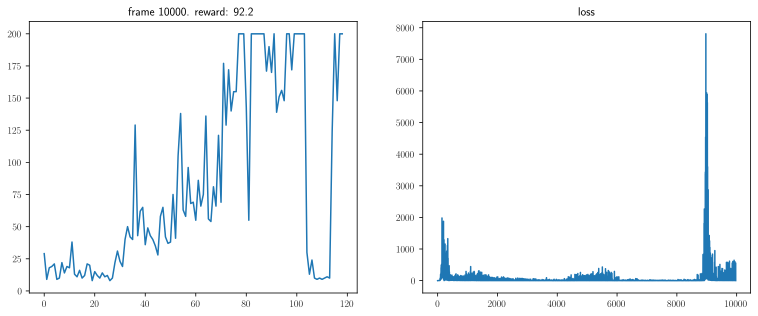

In [8]:
model = net(env.observation_space.shape[0], env.action_space.n)
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_frames = 10000
N = 1000
batch_size = 32
C = batch_size
eps_decay = 500
path = './temp/dqncartpole.pth'

dqn = DQN(env,model,optimizer,N=N, C = C, \
          num_frames = num_frames, batch_size = batch_size, eps_decay = eps_decay, path=path, verbose='plot')
output = dqn.solve()